# Lab de unsupervised learning hecho con el dataset de Mall_Customers.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd

customers = pd.read_csv("../Mall_Customers.csv")
customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
customers.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [4]:
customers.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
customers = pd.get_dummies(customers, drop_first=True)
customers.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,1,19,15,39,1
1,2,21,15,81,1
2,3,20,16,6,0
3,4,23,16,77,0
4,5,31,17,40,0


In [6]:
X = customers.drop('CustomerID', axis=1)

# K-means

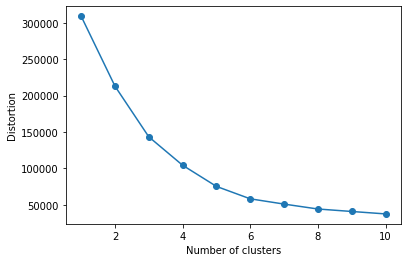

In [7]:
# calculate distortion for a range of number of cluster
# Esto me permite ver cuál es el número de clusters óptimo.

from sklearn.cluster import KMeans

distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

Voy a coger 5 clusters, ya que la distortion empieza a ser baja a partir de ahí.

In [8]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=5, random_state=5)

km.fit(X)
km.cluster_centers_

array([[40.32432432, 87.43243243, 18.18918919,  0.51351351],
       [25.27272727, 25.72727273, 79.36363636,  0.40909091],
       [45.2173913 , 26.30434783, 20.91304348,  0.39130435],
       [32.69230769, 86.53846154, 82.12820513,  0.46153846],
       [43.12658228, 54.82278481, 49.83544304,  0.41772152]])

In [9]:
y_km = km.predict(X)
clustered_customers = X.copy()
clustered_customers['Cluster_km'] = y_km
clustered_customers.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male,Cluster_km
0,19,15,39,1,2
1,21,15,81,1,1
2,20,16,6,0,2
3,23,16,77,0,1
4,31,17,40,0,2


In [10]:
clustered_customers['Cluster_km'].value_counts()

4    79
3    39
0    37
2    23
1    22
Name: Cluster_km, dtype: int64

In [11]:
clustered_customers.groupby(['Cluster_km'])['Annual Income (k$)'].mean()

Cluster_km
0    87.432432
1    25.727273
2    26.304348
3    86.538462
4    54.822785
Name: Annual Income (k$), dtype: float64

In [12]:
clustered_customers.groupby(['Cluster_km'])['Spending Score (1-100)'].mean()

Cluster_km
0    18.189189
1    79.363636
2    20.913043
3    82.128205
4    49.835443
Name: Spending Score (1-100), dtype: float64

De los dos resultados anteriores podemos concluir que:
* Cluster 0: cobran mucho y gastan poco.
* Cluster 1: cobran poco y gastan mucho.
* Cluster 2: cobran poco y gastan poco.
* Cluster 3: cobran mucho y gastan mucho.
* Cluster 4: cobran medio y gastan medio.

In [13]:
clustered_customers.groupby(['Cluster_km'])['Age'].mean()

Cluster_km
0    40.324324
1    25.272727
2    45.217391
3    32.692308
4    43.126582
Name: Age, dtype: float64

# Hierarchical Clustering

In [14]:
from sklearn.cluster import AgglomerativeClustering

hier_clust = AgglomerativeClustering(linkage='ward', n_clusters=5)
customers_hier = hier_clust.fit(X)

In [15]:
customers_hier

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=5,
                        pooling_func='deprecated')

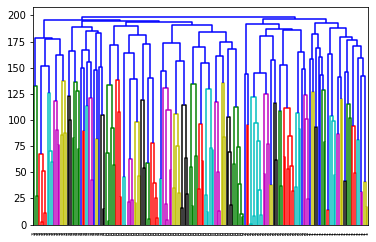

In [16]:
from scipy.cluster.hierarchy import dendrogram
import numpy as np

def plot_dendrogram(model, **kwargs):

    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
    
plot_dendrogram(customers_hier, labels=customers_hier.labels_)

In [17]:
print(customers_hier.n_clusters_)
print(customers_hier.labels_)
print(customers_hier.n_leaves_)
print(customers_hier.n_connected_components_)
print(customers_hier.children_)

5
[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 0 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 1 2 1 2 1 2 0 2 1 2 1 2 1 2 1 2 0 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]
200
1
[[ 65  68]
 [129 131]
 [  3   5]
 [ 48  49]
 [106 109]
 [100 105]
 [114 115]
 [ 92  96]
 [147 159]
 [133 137]
 [101 207]
 [ 13  15]
 [ 83  85]
 [117 119]
 [156 158]
 [ 16  20]
 [ 60  70]
 [150 152]
 [ 50  56]
 [112 121]
 [110 204]
 [ 95  97]
 [ 75  78]
 [ 84  87]
 [181 183]
 [113 206]
 [ 43  51]
 [ 11  19]
 [ 79 212]
 [ 62  67]
 [ 64  72]
 [130 136]
 [143 149]
 [139 209]
 [ 54  59]
 [ 74  80]
 [167 173]
 [123 127]
 [187 191]
 [ 89 210]
 [ 99 225]
 [154 217]
 [170 172]
 [ 26  28]
 [ 90 102]
 [ 61 200]
 [103 120]
 [134 138]
 [157 161]
 [176 178]
 [104 213]
 [202 211]
 [108 116]
 [

In [18]:
y_hier = customers_hier.labels_
clustered_customers['Cluster_hier'] = y_hier
clustered_customers.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male,Cluster_km,Cluster_hier
0,19,15,39,1,2,4
1,21,15,81,1,1,3
2,20,16,6,0,2,4
3,23,16,77,0,1,3
4,31,17,40,0,2,4


In [19]:
print(clustered_customers['Cluster_km'].value_counts().sort_values())
print(clustered_customers['Cluster_hier'].value_counts().sort_values())

1    22
2    23
0    37
3    39
4    79
Name: Cluster_km, dtype: int64
3    20
4    23
1    35
2    39
0    83
Name: Cluster_hier, dtype: int64


In [20]:
print(clustered_customers.groupby(['Cluster_km'])['Annual Income (k$)'].mean().sort_values())
print(clustered_customers.groupby(['Cluster_hier'])['Annual Income (k$)'].mean().sort_values())

Cluster_km
1    25.727273
2    26.304348
4    54.822785
3    86.538462
0    87.432432
Name: Annual Income (k$), dtype: float64
Cluster_hier
3    24.950000
4    26.304348
0    54.759036
2    86.538462
1    88.228571
Name: Annual Income (k$), dtype: float64


Aunque el nombre del cluster es diferente, vemos que hay correspondencia entre los dos modelos:
* Cluster 0 de km es el 1 de hier.
* Cluster 1 de km es el 3 de hier.
* Cluster 2 de km es el 4 de hier.
* Cluster 3 de km es el 2 de hier.
* Cluster 4 de km es el 0 de hier.

# Dimensionality reduction - PCA

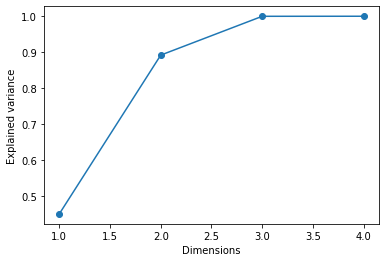

In [21]:
# Representamos en una gráfica la explained_variance acumulada en función del número de componentes utilizados.
from sklearn.decomposition import PCA
import numpy as np

pca = PCA()
pca.fit(X)
cumsum = np.cumsum(pca.explained_variance_ratio_)
# d = np.argmax(cumsum >= 0.95) + 1 -> No hace falta, ya le metemos el range en la x, correspondiente al número de comp.

plt.plot(range(1,len(cumsum)+1), cumsum, marker='o')
plt.xlabel('Dimensions')
plt.ylabel('Explained variance')
plt.show()

Nos sale que con 3 components tenemos una explained variance de 1 (ratio), lo cual hace que la reducción sea perfecta.

In [22]:
# Estas son los ratios de las  variances que ofrece cada componente.
pca.explained_variance_ratio_

array([4.51180770e-01, 4.40915393e-01, 1.07745663e-01, 1.58174873e-04])

In [23]:
pca = PCA(n_components=3, random_state=5)
X_reduced = pca.fit_transform(X)

Hemos conseguido transformar nuestra X de customers, que tenía 4 variables, por una nueva X_reduced, que tiene solo 3 componentes.

In [24]:
X_reduced = pd.DataFrame(X_reduced, columns=['C1', 'C2', 'C3'])
X_reduced

,C1,C2,C3
0,-31.869945,-33.001252,-22.142987
1,0.764494,-56.842901,-10.542634
2,-57.408276,-13.124961,-28.750964
3,-2.168543,-53.478590,-9.511588
4,-32.174085,-30.388412,-10.225069
...,...,...,...
195,58.352515,31.017542,3.200135
196,19.908001,66.446108,1.242664
197,58.520804,38.346039,-0.834218
198,20.979130,79.376405,-13.645474


A partir de aquí, podríamos volver al clusterizar nuestros datos usando cualquiera de los modelos anteriores.

# Dimensionality reduction - TSNE

Otra forma de reducir nuestra dimensión.

"The goal is to take a set of points in a high-dimensional space and find a faithful representation of those points in a lower-dimensional space, typically the 2D plane."

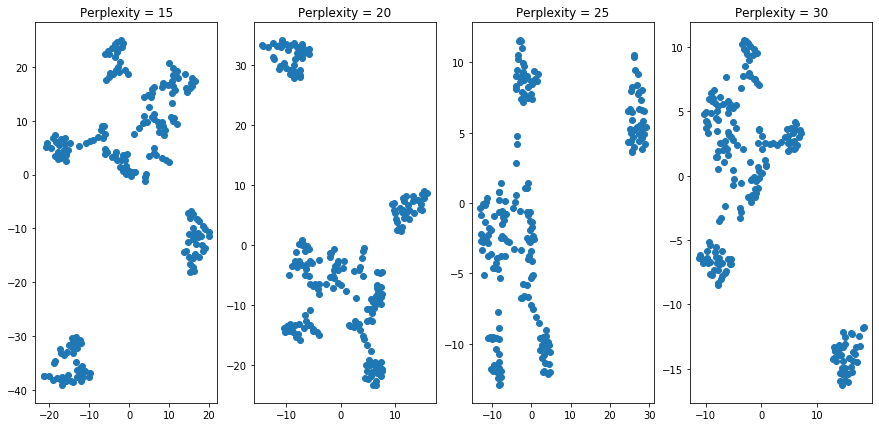

In [32]:
from sklearn.manifold import TSNE

fig, ax = plt.subplots(1, 4, figsize=(15, 7))
for i, perp in enumerate([15, 20, 25, 30]):
    tsne = TSNE(n_components=2 ,perplexity=perp, random_state=5)
    x_embedded = tsne.fit_transform(X)
    ax[i].scatter(x_embedded[:, 0], x_embedded[:, 1])
    ax[i].set_title(f"Perplexity = {perp}")

plt.show()